In [1]:
from ngrams import Ngram

In [2]:
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

# Load objects and preprocess

In [3]:
obj_tbl = pd.read_csv("../../data/tables/Objects.csv.gz")
str_cols = "Title", "Description"
txts = [s for col in str_cols for s in obj_tbl[col].dropna()]
tokens = [w for txt in txts for w in txt.split()]

print("number of docs: ", len(txts))
print("number of tokens: ", len(tokens))
print("number of types: ", len(set(tokens)))
print("TTR: ", round(len(set(tokens))/len(tokens), 4))

number of docs:  11199
number of tokens:  274580
number of types:  43518
TTR:  0.1585


# Initialise Typicality engine

i.e. count ngrams and compute probabilities, construct probability distribution

`a(text) \propto - log P(text)`

`a(T) \propto - \sum_{t \in T} log P(t)`

In [4]:
NG = Ngram(3, txts, precompute_freqs=True)

(2, 3)-grams: Padding documents...: 100%|██████████| 11199/11199 [00:00<00:00, 416629.06it/s]


(2, 3)-grams: Term Document Matrix constructed...
(2, 3)-grams: Term frequencies precomputed...
(2, 3)-grams: Init done


In [6]:
log_probs = np.asarray([NG.sent_prob(t) for t in tqdm(txts)])

100%|██████████| 11199/11199 [00:03<00:00, 3256.19it/s]


In [ ]:
lens = [len(list(NG.iter_ngrams(t))) for t in tqdm(txts)]

In [ ]:
sns.histplot(-log_probs/np.asarray(lens))

In [ ]:
obj_tbl

In [28]:
val_or_na = lambda f, x: f(x) if (type(x) is str) else None
n_toks = lambda t: len(list(NG.iter_ngrams(t)))
title_lg_ps = [val_or_na(NG.sent_prob, t) for t in tqdm(obj_tbl.Title)]
desc_lg_ps = [val_or_na(NG.sent_prob, t) for t in tqdm(obj_tbl.Description)]
title_lens = [val_or_na(n_toks, t) for t in tqdm(obj_tbl.Title)]
desc_lens = [val_or_na(n_toks, t) for t in tqdm(obj_tbl.Description)]


100%|██████████| 10537/10537 [00:00<00:00, 11726.13it/s][A

100%|██████████| 10537/10537 [00:03<00:00, 3228.75it/s]

100%|██████████| 10537/10537 [00:00<00:00, 80526.25it/s][A

100%|██████████| 10537/10537 [00:00<00:00, 21788.01it/s][A


In [29]:
obj_tbl = obj_tbl.assign(Title_p=title_lg_ps, Description_p=desc_lg_ps, 
                         Title_len=title_lens, Description_len=desc_lens)
obj_tbl = obj_tbl.assign(Title_p=-obj_tbl.Title_p, Description_p=-obj_tbl.Description_p)

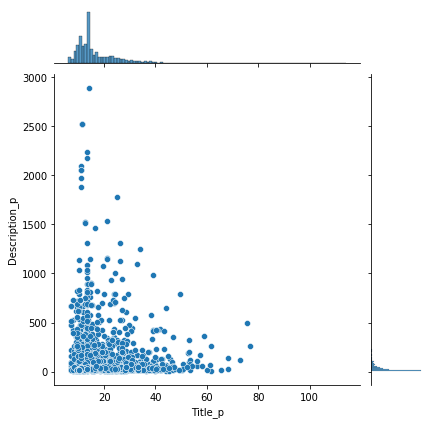

In [30]:
sns.jointplot(data=obj_tbl, x="Title_p", y="Description_p")

/home/valentin/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


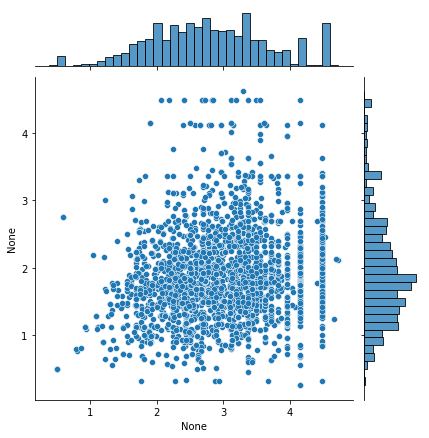

In [31]:
sns.jointplot(obj_tbl.Title_p/obj_tbl.Title_len, obj_tbl.Description_p/obj_tbl.Description_len)

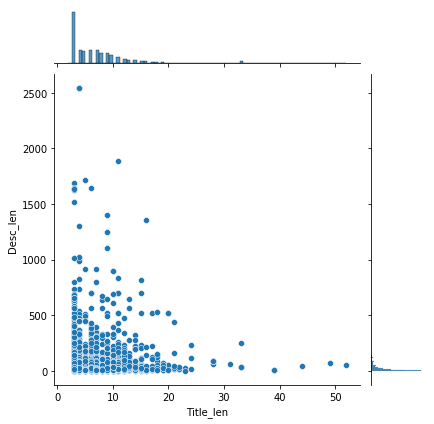

In [32]:
sns.jointplot(data=obj_tbl, x="Title_len", y="Desc_len")

In [ ]:
has_mens = obj_tbl.Description.apply(lambda t: "mens" in t if type(t) is str else False)
obj_tbl[has_mens].sort_values(by="avg_PMI")[["ObjectID", "Title", "Description", "avg_PMI"]]